### Practical Part

#### 2a)

The MSE for the PCA is 5.34983781649971e-32
The MSE for the ICA is 2.3523655900384882e-32


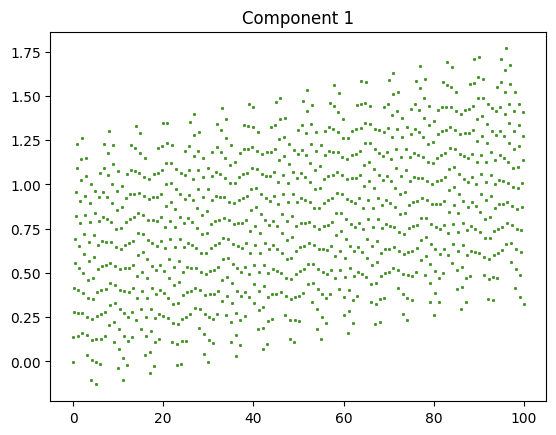

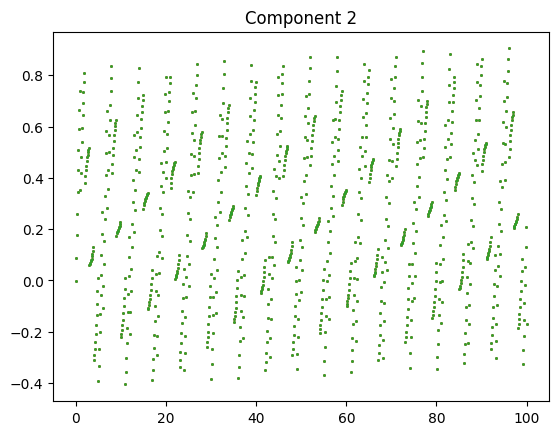

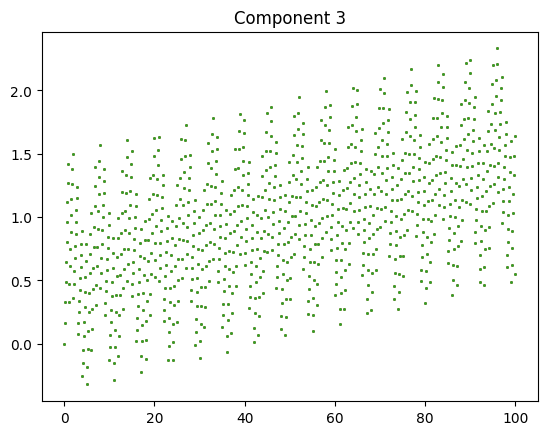

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
import warnings
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

# Generate three time series

def get_noise(t):
    return np.random.normal(0, 1, t)

t = np.linspace(0, 100, 1000)
func_1 = np.sin(t) + 0.001 * get_noise(len(t))
func_2 = 2*(t-np.floor(t)) + 0.002 * get_noise(len(t))
func_3 = 0.01 * t + 0.001 * get_noise(len(t))

# Generate Matrix

func = np.vstack([func_1, func_2, func_3])

A = np.random.rand(3, 3)

transformed_vals = np.dot(A, func)

# print(transformed_vals.shape)

# Perform PCA and ICA

pca = PCA(n_components=3, random_state=69)

result_1 = pca.fit_transform(transformed_vals.T)

ica = FastICA(n_components=3, random_state=69)

result_2 = ica.fit_transform(transformed_vals.T)

# Plotting the results

pca_back = pca.inverse_transform(result_1)
ica_back = ica.inverse_transform(result_2)

mse_pca = mean_squared_error(transformed_vals.T, pca_back)
mse_ica = mean_squared_error(transformed_vals.T, ica_back)

print(f"The MSE for the PCA is {mse_pca}")
print(f"The MSE for the ICA is {mse_ica}")

for i in range(3):
    plt.scatter(t, transformed_vals[i], s=1, label="Input Data")
    plt.scatter(t, pca_back[:, i], label="PCA", s=1)
    plt.scatter(t, ica_back[:, i], label="ICA", s=1)
    plt.title(f"Component {i+1}")
    plt.show()

#### 2b)

--- Results for Fashion-MNIST ---
PCA Explained Variance: 0.38
LDA Classification Accuracy: 0.77
ICA Kurtosis: [-0.3137953 -1.3589946]


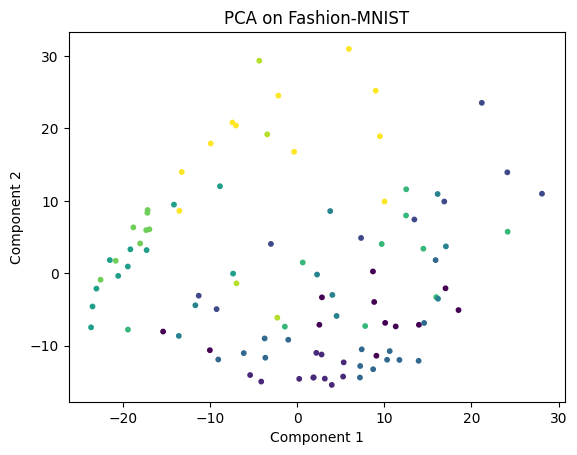

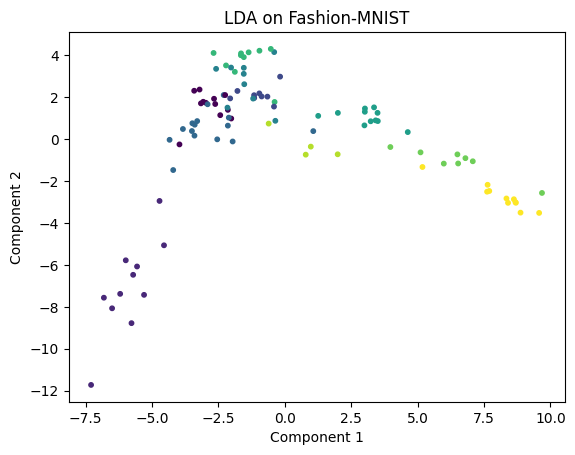

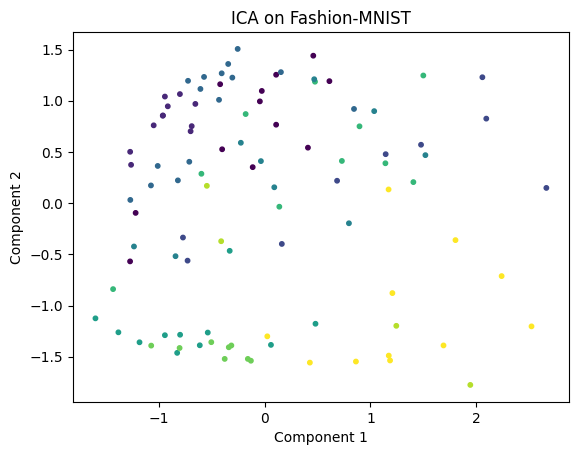

--- Results for Digits ---
PCA Explained Variance: 0.22
LDA Classification Accuracy: 0.68
ICA Kurtosis: [ 0.8969998 -0.7770392]


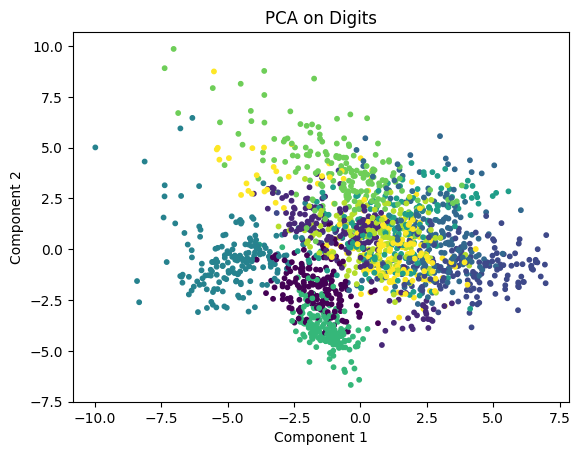

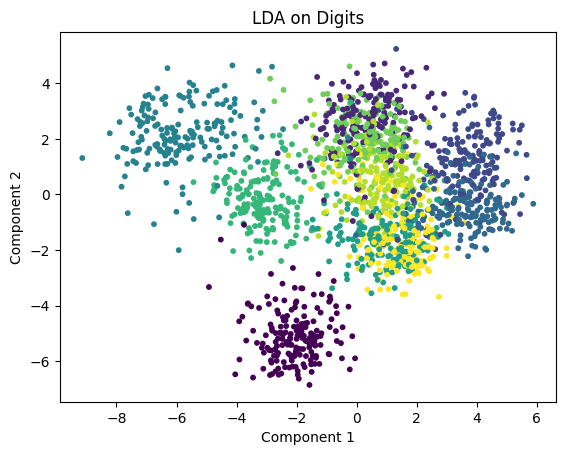

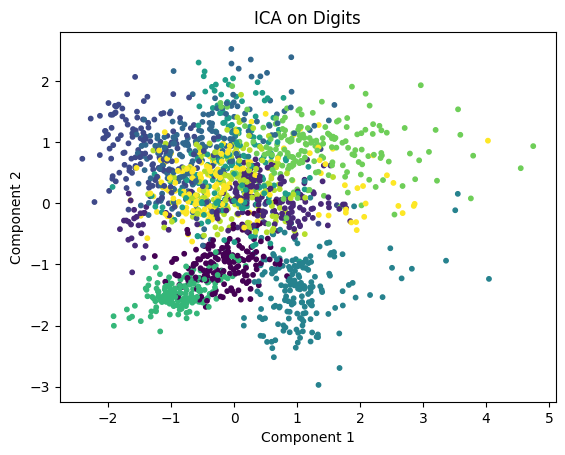

--- Results for Wine ---
PCA Explained Variance: 0.55
LDA Classification Accuracy: 1.00
ICA Kurtosis: [-0.97795816 -1.24622981]


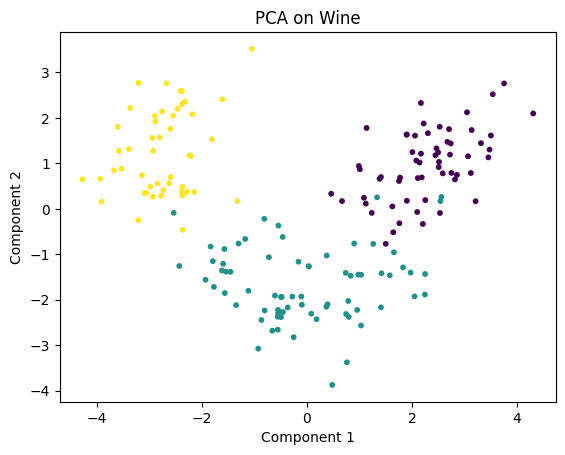

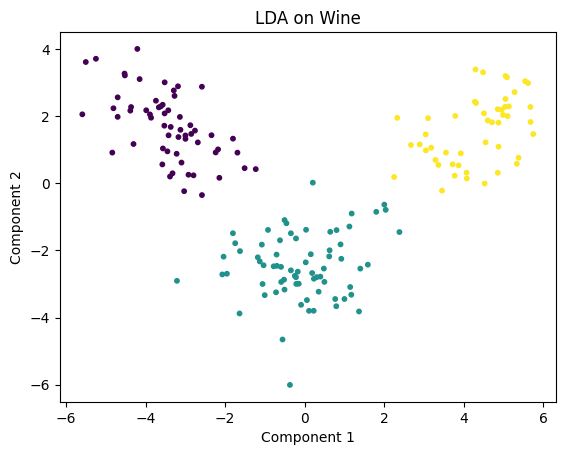

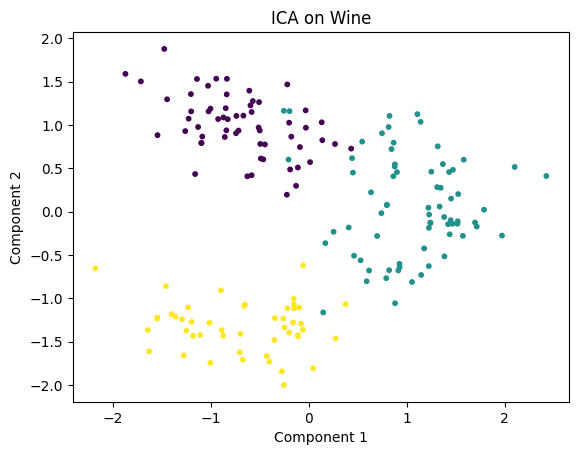

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_openml, load_digits, load_wine
from sklearn.metrics import accuracy_score
from scipy.stats import kurtosis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to perform and evaluate dimensionality reduction techniques
def evaluate_dimensionality_reduction(X, y, dataset_name):
    print(f"--- Results for {dataset_name} ---")

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA
    pca = PCA(n_components=2, random_state=69)
    X_pca = pca.fit_transform(X_scaled)
    pca_explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"PCA Explained Variance: {pca_explained_variance:.2f}")

    # Perform LDA
    lda = LDA(n_components=2)
    X_lda = lda.fit_transform(X_scaled, y)
    X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=69)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    lda_accuracy = clf.score(X_test, y_test)
    print(f"LDA Classification Accuracy: {lda_accuracy:.2f}")

    # Perform ICA
    ica = FastICA(n_components=2, random_state=69)
    X_ica = ica.fit_transform(X_scaled)
    ica_kurtosis = kurtosis(X_ica, axis=0)
    print(f"ICA Kurtosis: {ica_kurtosis}")
    #ica_kurtosis_mean = np.mean(ica_kurtosis)
    #print(f"ICA Mean Kurtosis: {ica_kurtosis_mean:.2f}")

    # Plot the results
    models = {"PCA": X_pca, "LDA": X_lda, "ICA": X_ica}
    for key, value in models.items():
        plt.figure()
        plt.scatter(value[:, 0], value[:, 1], c=y.astype(int), cmap='viridis', s=10)
        plt.title(f"{key} on {dataset_name}")
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.show()

# Load the datasets
# 1. Fashion-MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST')
X, y = fashion_mnist['data'], fashion_mnist['target']
X = X[:100]
y = y[:100]
evaluate_dimensionality_reduction(X, y, "Fashion-MNIST")

# 2. Digits dataset
digits = load_digits()
X_digits, y_digits = digits.data, digits.target
evaluate_dimensionality_reduction(X_digits, y_digits, "Digits")

# 3. Wine dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
evaluate_dimensionality_reduction(X_wine, y_wine, "Wine")

#besser wäre gewesen reconstruction error, silhouette score
#damit man die werte zwischen den verfahren vergleichen kann
